<a href="https://colab.research.google.com/github/AKSHAYA1006/Heart-Disease-Prediction-using-Machine-Learning-/blob/main/Heart_disase_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
print("Shape of data:", data.shape)
print(data.info())
print(data.describe())
print("Missing values:\n", data.isnull().sum())
print("Target value counts:\n", data['target'].value_counts())


Shape of data: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.6831

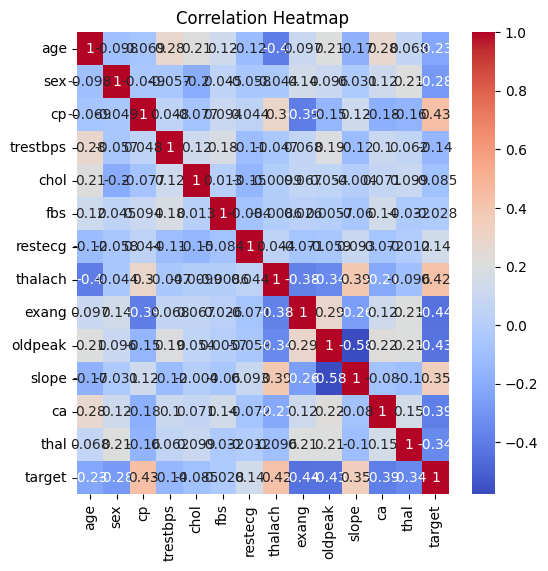

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, stratify=Y, random_state=2
)

In [ ]:
model_results = {}

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(Y_test, log_pred)
model_results['Logistic Regression'] = log_acc
print("Logistic Regression Accuracy:", log_acc)
print(classification_report(Y_test, log_pred))


Logistic Regression Accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
model_results['Random Forest'] = rf_acc
print("Random Forest Accuracy:", rf_acc)
print(classification_report(Y_test, rf_pred))


Random Forest Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)
model_results['SVM'] = svm_acc
print("SVM Accuracy:", svm_acc)
print(classification_report(Y_test, svm_pred))

SVM Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)
model_results['KNN'] = knn_acc
print("KNN Accuracy:", knn_acc)
print(classification_report(Y_test, knn_pred))

KNN Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
best_model_name = max(model_results, key=model_results.get)
best_model_score = model_results[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {best_model_score:.4f}")



✅ Best Model: KNN with Accuracy: 0.8197


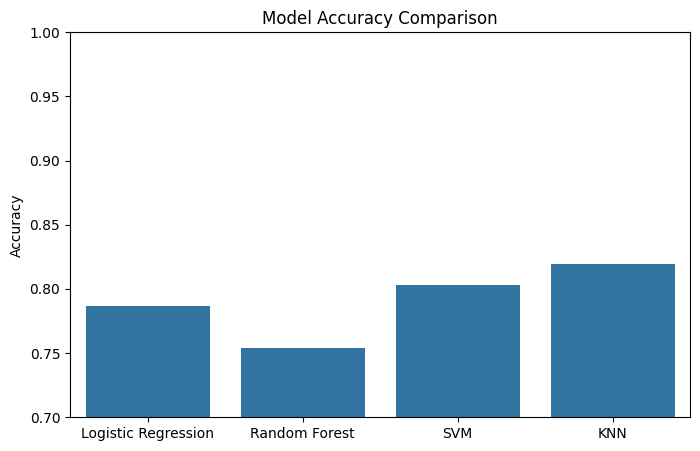

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1.0)
plt.show()


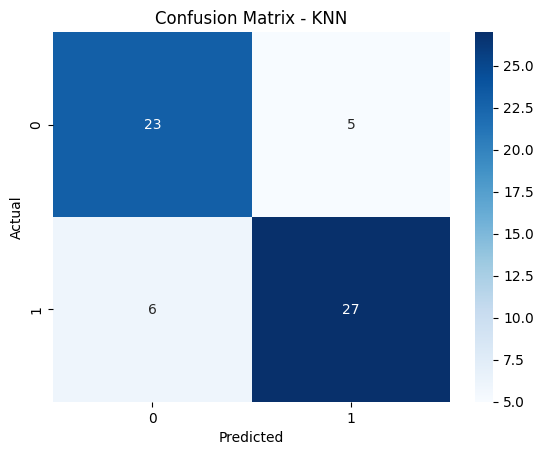

In [ ]:
if best_model_name == 'Random Forest':
    best_model = rf_model
    best_pred = rf_pred
elif best_model_name == 'Logistic Regression':
    best_model = log_model
    best_pred = log_pred
elif best_model_name == 'SVM':
    best_model = svm_model
    best_pred = svm_pred
else:
    best_model = knn_model
    best_pred = knn_pred

cm = confusion_matrix(Y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
feature_names = X.columns
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
input_df = pd.DataFrame([input_data], columns=feature_names)
input_scaled = scaler.transform(input_df)
prediction = best_model.predict(input_scaled)

print("\n🔍 Final Prediction:")
if prediction[0] == 0:
    print("❌ The Person does NOT have Heart Disease")
else:
    print("✅ The Person HAS Heart Disease ❤️")



🔍 Final Prediction:
✅ The Person HAS Heart Disease ❤️


In [ ]:
import pickle

with open('heart_disease_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved successfully!")

✅ Model and Scaler saved successfully!


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

In [ ]:
# Replace YOUR_AUTHTOKEN_HERE with your actual authtoken
!ngrok config add-authtoken 308eRFbamqOfI9hB4isLzhzu5SE_83769yBvnbJxkuWBW6vVT

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle
model = pickle.load(open('heart_disease_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

st.set_page_config(page_title="Heart Disease Prediction", page_icon="❤️")
st.title("❤️ Heart Disease Prediction Web App")
st.write("Enter the patient details below to predict the possibility of heart disease.")

# Input form
with st.form("heart_form"):
    age = st.slider("Age", 20, 100, 50)
    sex = st.selectbox("Sex", [0, 1], format_func=lambda x: "Female" if x == 0 else "Male")
    cp = st.selectbox("Chest Pain Type", [0, 1, 2, 3], format_func=lambda x: ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"][x])
    trestbps = st.number_input("Resting Blood Pressure (mm Hg)", 80, 200, 120)
    chol = st.number_input("Serum Cholesterol (mg/dl)", 100, 600, 200)
    fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", [0, 1], format_func=lambda x: "No" if x == 0 else "Yes")
    restecg = st.selectbox("Resting ECG", [0, 1, 2])
    thalach = st.slider("Max Heart Rate Achieved", 60, 220, 150)
    exang = st.selectbox("Exercise Induced Angina", [0, 1], format_func=lambda x: "No" if x == 0 else "Yes")
    oldpeak = st.slider("Oldpeak (ST Depression)", 0.0, 6.0, 1.0, step=0.1)
    slope = st.selectbox("Slope of ST Segment", [0, 1, 2])
    ca = st.selectbox("Major Vessels (0-3)", [0, 1, 2, 3])
    thal = st.selectbox("Thalassemia", [0, 1, 2], format_func=lambda x: ["Normal", "Fixed Defect", "Reversible Defect"][x])

    submitted = st.form_submit_button("Predict")

if submitted:
    # Prepare data
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                            exang, oldpeak, slope, ca, thal]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    # Output
    if prediction == 1:
        st.error(f"⚠️ The person is likely to have heart disease.\n\n**Probability: {probability:.2f}**")
    else:
        st.success(f"✅ The person is not likely to have heart disease.\n\n**Probability: {probability:.2f}**")


Overwriting app.py


In [ ]:
!streamlit run app.py &>/content/log.txt &


In [ ]:
public_url = ngrok.connect(8501)
print("🌐 Your app is live at:", public_url)

🌐 Your app is live at: NgrokTunnel: "https://cb0ce9dc31d9.ngrok-free.app" -> "http://localhost:8501"
